# Japan Life Expectancy Regression

Japan has the one of the highest life expectancy of any country in the world, with an average of 84.26 years. Its life expectancy can be attributed to several factors such as technological advancemnets in the medical field and economic progress in recent years. This project focuses on a dataset that contains information such as life expectancy, various medical facilities and urban facilities in all of Japan prefectures. The purpose of this project is to identify major factors that contribute to Japan's life expectancy and develop a machine learning model that can accurately predict the life expectancy of each prefecture based on their features. The dataset was provided by a user on Kaggle.(https://www.kaggle.com/datasets/gianinamariapetrascu/japan-life-expectancy)

### Import Libraries

In [71]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### Load and Inspect Data 

In [72]:
df = pd.read_csv('Japan_life_expectancy.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prefecture         47 non-null     object 
 1   Life_expectancy    47 non-null     float64
 2   Physician          47 non-null     float64
 3   Junior_col         47 non-null     float64
 4   University         47 non-null     float64
 5   Public_Hosp        47 non-null     float64
 6   Pshic_hosp         47 non-null     float64
 7   Beds_psic          47 non-null     float64
 8   Nurses             47 non-null     float64
 9   Avg_hours          47 non-null     float64
 10  Salary             47 non-null     float64
 11  Elementary_school  47 non-null     float64
 12  Sport_fac          47 non-null     float64
 13  Park               47 non-null     float64
 14  Forest             47 non-null     float64
 15  Income_per capita  47 non-null     float64
 16  Density_pop        47 non-nu

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,Akita,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,Aomori,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,Chiba,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


The dataset contains 47 rows for each prefecture and 23 columns that contain information on various features. This dataset does not contain any null values which makes it easier for analysis. 

Here's a summary of all the columns:

- **Prefecture**: Japanese prefecture
- **Life_expectancy**: Average life expectancy at birth (years)
- **Physician**: Number of physicians working at medical facilities (per 100,000 persons)
- **Junior_col**: Percentage of people having completed up to junior colleges or equivalent
- **University**: Percentage of people having completed up to colleges and universities
- **Public_Hosp**: Percentage of public general hospitals
- **Pshic_hosp**: Number of psychiatric hospitals (per 100,000 persons)
- **Beds_psic**: Number of beds for mental illness (per 100,000 persons)
- **Nurses**: Number of nurses and assistant nurses working at medical facilities (per 100,000 persons)
- **Avg_hours**: Hours worked (Monthly average)
- **Salary**: Average salary of full-time workers
- **Elementary_school**: Percentage of people having completed up to elementary or lower secondary school only
- **Sport_fac**: Number of sports facilities (per 1,000,000 persons)
- **Park**:	Percentage of natural park area (% total land)
- **Forest**: Percentage of forest area (% total land)
- **Income_per capita**: Prefectural income per person (2011 base)
- **Density_pop**: Population/area (km^2)
- **Hospitals**: Number of general hospitals (per 100,000 persons)
- **Beds**: Number of beds in general hospitals (per 100,000 persons)
- **Ambulances**: Number of ambulances (per 100,000 persons)
- **Health_exp**: Percentage of health expenditure (Prefecture)
- **Educ_exp**:	Percentage of education expenditure (Prefecture) %
- **Welfare_exp**: Percentage of welfare expenditure (Prefecture) %

## Exploratory Data Analysis

First, we will look at relationship between life expectancy and the other features using scatterplots.

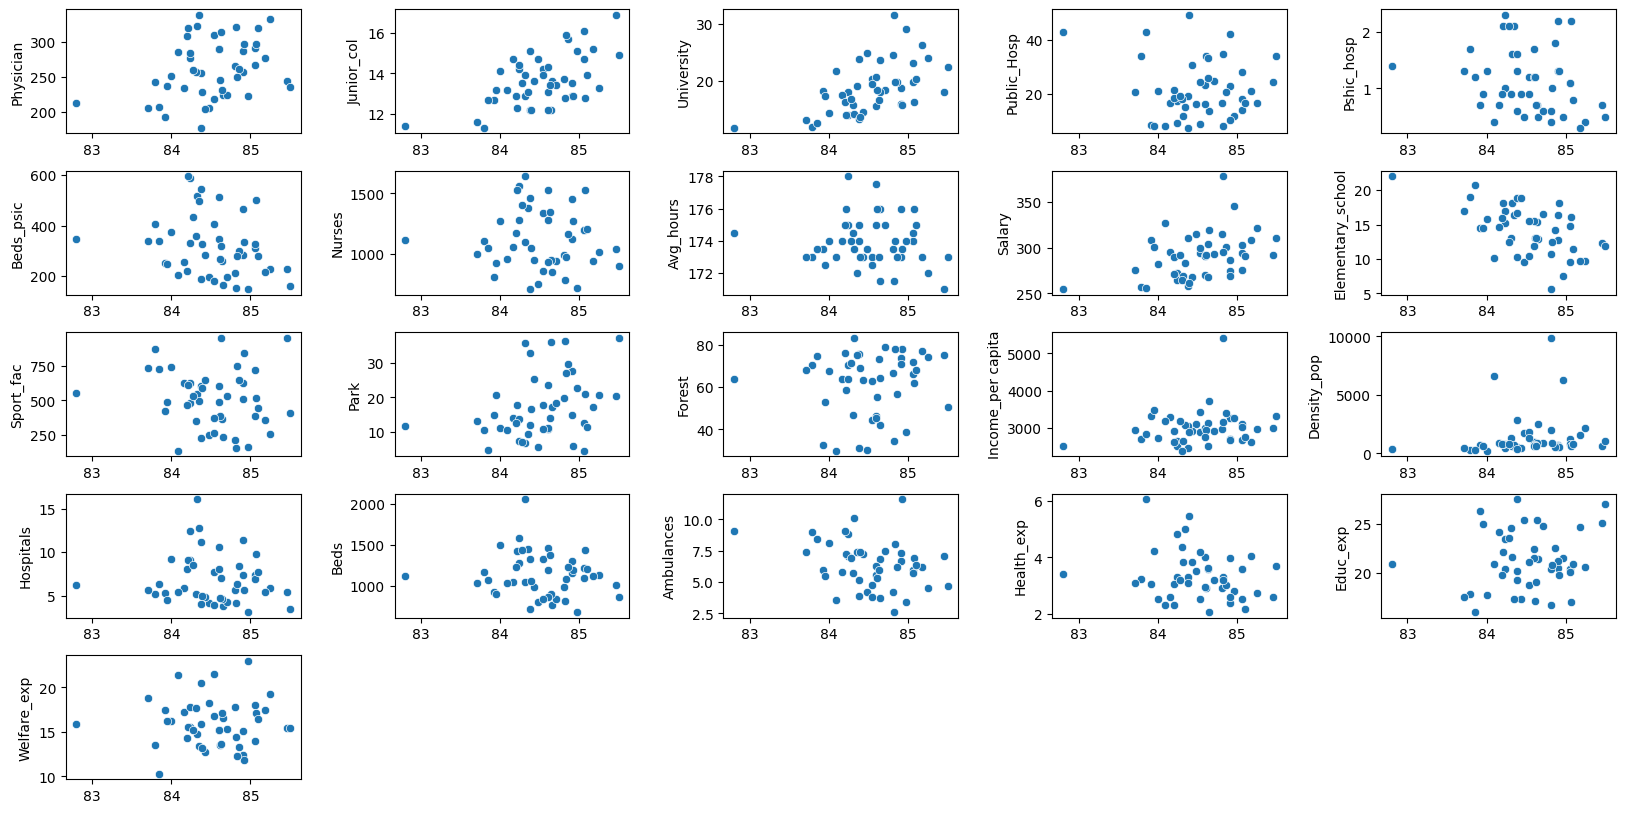

In [73]:
features = df.drop(columns = ['Prefecture', 'Life_expectancy']).columns
features[0]

# Plotting scatterplots
plt.figure(figsize = (20,10))
plt.subplots_adjust(wspace=0.4,hspace=0.3)

for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.scatterplot(x = df['Life_expectancy'], y = df[features[i]])
    plt.xlabel('')

plt.show()

From the graphs above, we can identify that 'Physician', 'Junior_col', 'Salary' and 'University' have a positive trend with life expectancy. In addition, it seems that 'Elementary_school' has a more obvious negative trend with life expectancy. There does not seem to be any obvious trend for the other plots. We will continue to look at the correlation of these features in the next section.

## Feature Importances

### Pearson's Correlation

In [74]:
# Feature and target variables
X = df.drop(columns = ['Prefecture'])
y = df.Life_expectancy

# Correlation matrix
corr_matrix = X.corr(method = 'pearson')

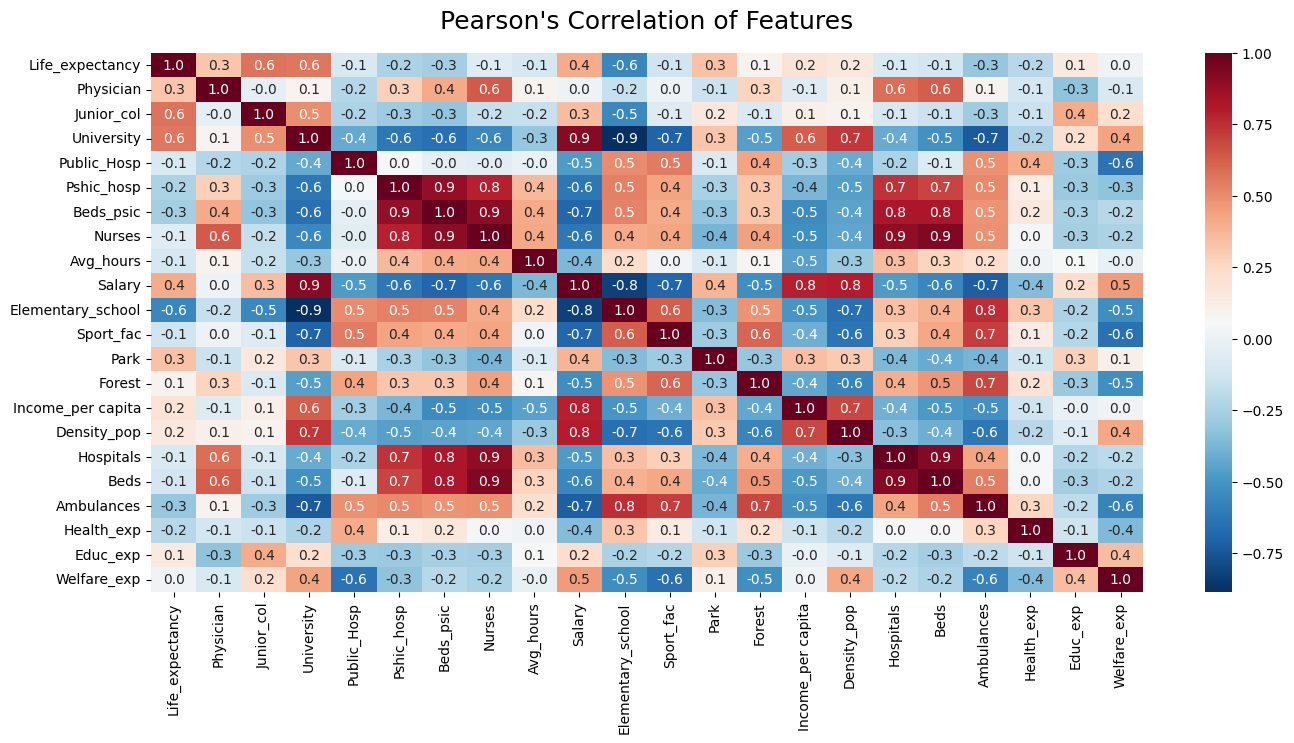

In [75]:
# Creating heatmap of correlation matrix
plt.figure(figsize = (16,7))
plt.title("Pearson's Correlation of Features", fontsize = 18, y = 1.03)
sns.heatmap(corr_matrix, annot = True, cmap = 'RdBu_r', fmt = '.1f')
plt.show()

The heatmap above shows Pearson's correlation between the different features. It shows that 'Nurses', 'Pshic_hosp' and 'Beds_psic' have a high correlation with 'Hospitals' and 'Beds' which makes sense. We can also see that 'Salary' also has a really high correlation with 'University'. We will remove some of these features that have a high correlation with each other to reduce dimensionality

In [76]:
# Reducing dimensionality
X_modified = df.drop(columns = ['Life_expectancy', 'Prefecture', 'Hospitals', 'Beds', 'Salary'])

### Squared Error

In [77]:
# Initialising StandardScaler
scaler = StandardScaler()

# Apply the transformations to the training data
X_preprocessed = scaler.fit_transform(X_modified)
X_preprocessed = pd.DataFrame(X_preprocessed, columns = scaler.get_feature_names_out())

# Split the data into train and test sets
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(X_preprocessed, y, test_size=0.3, random_state=0)

In [78]:
# Initialising regression model
regressor = RandomForestRegressor(random_state = 0, criterion = 'squared_error')

# Fitting model to training data
regressor.fit(x_train_processed, y_train_processed)

RandomForestRegressor(random_state=0)

In [79]:
# Get feature importances
importances = regressor.feature_importances_

# Create a DataFrame to view feature importances
feature_importances = pd.DataFrame({'feature': X_preprocessed.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print the top 15 most important features
print(feature_importances)

              feature  importance
2          University    0.213503
10               Park    0.109911
0           Physician    0.101672
1          Junior_col    0.083023
16           Educ_exp    0.081719
3         Public_Hosp    0.067388
8   Elementary_school    0.048509
15         Health_exp    0.044957
9           Sport_fac    0.033861
5           Beds_psic    0.032875
7           Avg_hours    0.031466
6              Nurses    0.029417
11             Forest    0.026995
14         Ambulances    0.024108
13        Density_pop    0.023287
12  Income_per capita    0.016291
17        Welfare_exp    0.015973
4          Pshic_hosp    0.015043


## Model Selection and Evaluation

In [80]:
# Initialising RandomForestRegressor model
rfr = RandomForestRegressor(random_state = 0)

# Fitting model to training set
rfr.fit(x_train_processed, y_train_processed)
y_pred = rfr.predict(x_test_processed)

In [81]:
#Training and testing score
train_score = rfr.score(x_train_processed, y_train_processed)
test_score = rfr.score(x_test_processed, y_test_processed)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.861127273010019
Test Score: 0.3851457526775056


It seems that our model is overfitting since it is performing really well with our training set but poorly with our testing score. This could be due to insufficient data as our dataset only contains 47 rows of data. 

## Model Validation

### K-Fold 

In [82]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rfr, x_train_processed, y_train_processed.values.ravel(), cv=5, scoring='neg_mean_squared_error')

# Converting the negative MSE to positive and take the square root
rmse_scores = (-cv_scores) ** 0.5

# Display the RMSE for each fold and the average RMSE
print("RMSE for each fold: ", rmse_scores)
print("Average RMSE: ", rmse_scores.mean())

RMSE for each fold:  [0.47638456 0.39347834 0.56119286 0.28997913 0.23106365]
Average RMSE:  0.39041970757499894


## Pipeline

In [83]:
# Numerical values
num_vals = X_modified.select_dtypes(include = 'float').columns

# Preprocessing
preprocesser = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_vals)
    ]
)

pipeline = Pipeline([('preprocessing', preprocesser), ('regression', rfr)])

In [84]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_modified, y, test_size = 0.3, random_state = 0)

# Fitting model and predicting values
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

# Pipeline score
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8603602183395896
Test Score: 0.3832892195901175


## Conclusion

This project focuses on the life expectancy in Japan and identifying any trends between a prefecture's features with life expectancy. We discovered that a higher average salary and the number of University graduates had a high correlation with life expectancy using Pearson's correlation. We also developed a model that attempted to accurately predict the life expectancy of a prefecture based on its features. However, due to the size of our data, our model only performed well on our training dataset and not on our testing dataset (Overfitting). For future reference, it would be more advantageous to select a larger dataset to allow the model to train. 